In [1]:
import torch
import torchvision
from torch import nn
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

### Binary

In [2]:
class binary_nn(nn.Module):
    def __init__(self, inplen, hidlen):
        super(binary_nn, self).__init__()
        self.linear1 = nn.Linear(inplen, hidlen) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidlen, 1)  
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.relu(out1)
        out3 = self.linear2(out2)
        y_pred = torch.sigmoid(out3)
        return y_pred

model = binary_nn(inplen=28*28, hidlen=5)
loss = nn.BCELoss()

In [3]:
class Binary_nn(nn.Module):
    def __init__(self , inp_len , hid_len):
        super(Binary_nn , self).__init__()
        self.linear1 = nn.Linear(in_features=inp_len , out_features=hid_len)
        self.tanh = nn.Tanh()
        self.linear2 = nn.Linear(in_features=hid_len , out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self , x):
        out1  = self.linear1(x)
        out2  = self.tanh(out1)
        out3  = self.linear2(out2)
        yprd = self.sigmoid(out3)
        return yprd

## Multiclass problem

In [4]:
class Multiclass_nn(nn.Module):
    def __init__(self, inplen, hidlen, outlen):
        super(Multiclass_nn, self).__init__()
        self.linear1 = nn.Linear(inplen, hidlen) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidlen, outlen)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out
    
model = Multiclass_nn(inplen=28*28, hidlen=5, outlen=3)
loss = nn.CrossEntropyLoss()  

### Multi-layer neural network example

parameters

In [5]:
inp_len = 28 * 28
hid_len = 600
alpha = 0.009
num = 4
batch_len = 100
out_len = 10
total_number = 0
correct_number = 0

In [6]:
trainDataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),  download=True)
testDataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=trainDataset , shuffle=True , batch_size=batch_len)
test_loader  = torch.utils.data.DataLoader(dataset=testDataset , shuffle=False , batch_size=batch_len)

In [8]:
len(train_loader), len(test_loader)

(600, 100)

In [9]:
examples = iter(test_loader)
example_data, example_targets = next(examples)
example_data.shape , example_targets.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

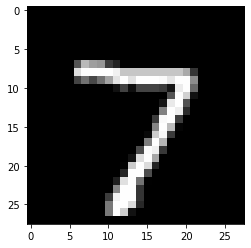

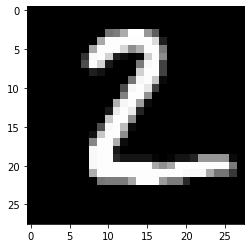

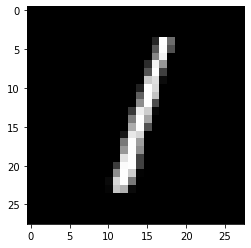

In [10]:
for i in range(3):
    plt.imshow(example_data[i][0] , cmap="gray")
    plt.show()

In [11]:
class Multiclass_nn(nn.Module):
    def __init__(self, inp_len, hid_len, out_len):
        super(Multiclass_nn, self).__init__()
        self.linear1 = nn.Linear(inp_len, hid_len) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hid_len, out_len)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [12]:
loss = nn.CrossEntropyLoss()
Sample = Multiclass_nn(inp_len=inp_len , hid_len=hid_len , out_len=out_len)
optim  = torch.optim.Adam(Sample.parameters() , lr = alpha)

In [13]:
cnt = 0
for epoch in range(num):
    for index , (img , label) in enumerate(train_loader):
        img = img.reshape(-1 , 28*28)
        
        out_prd = Sample(img)
        ls = loss(out_prd , label)
        ls.backward()

        optim.step()
        optim.zero_grad()

        cnt = cnt + 1
        if (index % 100 == 0):
            print(cnt ,'. ' , "Loss = " , ls.item())

1 .  Loss =  2.2977991104125977
101 .  Loss =  0.22120408713817596
201 .  Loss =  0.1645980328321457
301 .  Loss =  0.23784953355789185
401 .  Loss =  0.06243738532066345
501 .  Loss =  0.09986796975135803
601 .  Loss =  0.07301396131515503
701 .  Loss =  0.21245194971561432
801 .  Loss =  0.08249115943908691
901 .  Loss =  0.03590553626418114
1001 .  Loss =  0.06539831310510635
1101 .  Loss =  0.028175080195069313
1201 .  Loss =  0.05795126035809517
1301 .  Loss =  0.13942435383796692
1401 .  Loss =  0.13627798855304718
1501 .  Loss =  0.022473005577921867
1601 .  Loss =  0.05909555032849312
1701 .  Loss =  0.05919550359249115
1801 .  Loss =  0.058805350214242935
1901 .  Loss =  0.07961157709360123
2001 .  Loss =  0.0518152192234993
2101 .  Loss =  0.040796909481287
2201 .  Loss =  0.028696691617369652
2301 .  Loss =  0.046891022473573685


In [14]:
with torch.no_grad():
    for img, label in test_loader:
        img = img.reshape(-1, 28*28)
        prd = Sample(img)
    
        _, maxprd = torch.max(prd.data, 1)
        total_number += label.size(0)
        correct_number += (maxprd == label).sum().item()

    accuracy = 100* (correct_number / total_number)
    print("Accuracy of the neural network is = " , accuracy,"%")

Accuracy of the neural network is =  97.16 %
